# CityJSON

https://www.cityjson.org/

Standard: https://www.cityjson.org/specs/1.0.3/

## QGIS Plugin für CityJSON

https://github.com/cityjson/cityjson-qgis-plugin

### Installation

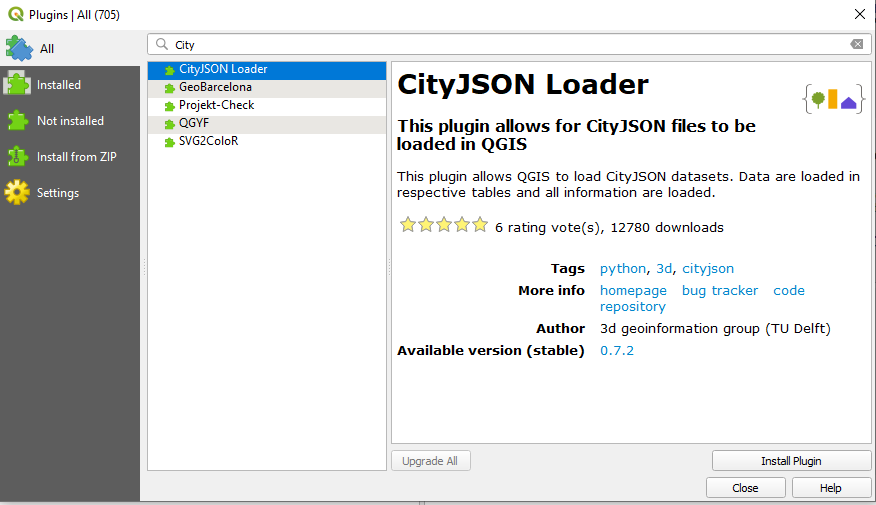
    
     
    * Unter "Plugins->Manage and Install Plugins"...
    *CityJSON Loader plugin suchen und installieren

### Verwenden

Nach der Installation gibt es unter dem Menü `Vector` einen Neuen Eintrag: `CityJSON Loader`->`Load CityJSON...`. Mit diesem wird das CityJSON-Dialogfenster geöffnet. Dort kann man einen Datensatz auswählen und hinzufügen.

Sie können die Option `Layer nach Objekttyp aufteilen` aktivieren, um verschiedene Objekttypen als verschiedene Layer in QGIS zu laden.

#### 3D-Ansicht in QGIS 3.x

CityJSON Loader aktiviert **automatisch** den 3D-Renderer in neueren QGIS Versionen.
Bei vorherigen Versionen muss man diesen folgendermassen manuell aktivieren.

* Rechten Maustaste auf den Layer klicken `Eigenschaften...`
* Im Feld "3D-Ansicht" und die Option "3D-Renderer aktivieren" anklicken

**3D Kartenansicht aktivieren:**

* Im QGIS 3 Menü `Ansicht`->`Neue 3D-Kartenansicht`, um die 3D-Geometrie zu sehen.

### Daten

* CityJSON Beispieldateien können hier heruntergeladen werden: https://www.cityjson.org/datasets/
            
* Oder von CityGML nach CityJSON konvertieren mit cjio oder FME
     
Einige Kantone haben CityGML, aber (noch) nicht unbedingt als Open Data, zum Beispiel:   

* BS: https://www.geo.bs.ch/
* BL: https://www.baselland.ch/politik-und-behorden/direktionen/volkswirtschafts-und-gesundheitsdirektion/amt-fur-geoinformation/geoportal/geodaten/geodatenprodukte/gebaeude/3d-gebaeudemodelle
* ZH: https://www.stadt-zuerich.ch/ted/de/index/geoz/geodaten_u_plaene/3d_stadtmodell.html

            
Auch interessant: https://github.com/opencitymodel/opencitymodel          

## CityJSON mit Python

Installation Modul:
    
    pip install cjio


### Datensätze

Wr verwenden diese 2 Datensätze:
* Zürich Stadtmodell: https://3d.bk.tudelft.nl/opendata/cityjson/1.0/Zurich_Building_LoD2_V10.json
* Demo Datensatz mit 2 Gebäuden: https://www.cityjson.org/tutorials/files/twobuildings.json



GeoJSON können auchg im Online Viewer angesehen werden:

https://ninja.cityjson.org/

**Die Files sind bereits auf dem Server im globalen Verzeichnis**:

Falls das Notebook lokal ausgeführt wird, so muss der Pfad angepasst werden


In [1]:
import cjio
import geoutils


In [2]:
dataset1 = "/data/geo/opengeodata/twobuildings.json"
dataset2 = "/data/geo/opengeodata/Zurich_Building_LoD2_V10.json"

In [3]:
#!cat $dataset1

In [4]:
# fehlt im env
!cjio $dataset1 info

/bin/bash: cjio: command not found


Aufgrund Serverkonfiguration müssen wir das allerdings so aufrufen, bei lokaler installation

In [5]:
!/opt/anaconda3/envs/geopython/bin/cjio $dataset1 info

Parsing /data/geo/opengeodata/twobuildings.json
{
  "cityjson_version": "1.0",
  "epsg": null,
  "bbox": [
    300578.235,
    5041258.061,
    13.688,
    300618.138,
    5041289.394,
    29.45
  ],
  "transform/compressed": false,
  "cityobjects_total": 2,
  "cityobjects_present": [
    "Building"
  ],
  "materials": false,
  "textures": false
}


In [6]:
!/opt/anaconda3/envs/geopython/bin/cjio $dataset2 info

Parsing /data/geo/opengeodata/Zurich_Building_LoD2_V10.json
{
  "cityjson_version": "1.0",
  "epsg": null,
  "bbox": [
    2677116.375,
    1241839.025,
    0.0,
    2689381.984,
    1254150.95,
    1044.25
  ],
  "transform/compressed": true,
  "cityobjects_total": 52834,
  "cityobjects_present": [
    "Building",
    "BuildingPart"
  ],
  "materials": false,
  "textures": false
}


In [7]:
!/opt/anaconda3/envs/geopython/bin/cjio $dataset1 validate

Parsing /data/geo/opengeodata/twobuildings.json
===== Validation (with official CityJSON schemas) =====
-- Validating the syntax of the file
	(using the schemas 1.0.1)
-- Validating the internal consistency of the file (see docs for list)
	--Vertex indices coherent
	--Specific for CityGroups
	--Semantic arrays coherent with geometry
	--Root properties
	--Empty geometries
	--Duplicate vertices
	--Orphan vertices
	--CityGML attributes
=====
File is valid
File has no warnings


## Python Interface

In [8]:
from cjio import cityjson

cm = cityjson.load(dataset1)

In [9]:
cm.validate()

-- Validating the syntax of the file
	(using the schemas 1.0.1)
-- Validating the internal consistency of the file (see docs for list)
	--Vertex indices coherent
	--Specific for CityGroups
	--Semantic arrays coherent with geometry
	--Root properties
	--Empty geometries
	--Duplicate vertices
	--Orphan vertices
	--CityGML attributes


(True, True, [], [])

In [10]:
print(cm)

{
  "cityjson_version": "1.0",
  "epsg": null,
  "bbox": [
    300578.235,
    5041258.061,
    13.688,
    300618.138,
    5041289.394,
    29.45
  ],
  "transform/compressed": false,
  "cityobjects_total": 2,
  "cityobjects_present": [
    "Building"
  ],
  "materials": false,
  "textures": false
}


In [11]:
cm = cityjson.load(dataset2)

In [12]:
print(cm)

{
  "cityjson_version": "1.0",
  "epsg": null,
  "bbox": [
    2677116.375,
    1241839.025,
    0.0,
    2689381.984,
    1254150.95,
    1044.25
  ],
  "transform/compressed": true,
  "cityobjects_total": 52834,
  "cityobjects_present": [
    "Building",
    "BuildingPart"
  ],
  "materials": false,
  "textures": false
}


In [13]:
buildings = cm.get_cityobjects(type='building')
#buildings

In [14]:
buildings_ids = cm.get_cityobjects(id=["UUID_c9884c4e-1cac-47f5-b88b-6fb074c0ae50"]) # eines oder mehrere Gebäude selektieren

In [15]:
b1 = buildings_ids['UUID_c9884c4e-1cac-47f5-b88b-6fb074c0ae50']

In [16]:
b1

{
  "id": "UUID_c9884c4e-1cac-47f5-b88b-6fb074c0ae50",
  "type": "Building",
  "attributes": {
    "creationDate": "2017-01-23",
    "class": "BB01",
    "Herkunft": "EE_LB_2007",
    "QualitaetStatus": 1,
    "FileCreationDate": "2012-02-23",
    "Region": 2,
    "GebaeudeStatus": 1
  },
  "children": [
    "UUID_93fc5bae-4446-4336-9ff8-6679ebfdfde3"
  ],
  "parents": [],
  "geometry_type": [],
  "geometry_lod": [],
  "semantic_surfaces": []
}

In [17]:
buildings = cm.get_cityobjects(type='buildingpart')
#buildings

In [18]:
buildings_ids = cm.get_cityobjects(id=["UUID_a4a09780-153f-4385-ad19-3a92a6c4eec4"]) # eines oder mehrere Gebäude selektieren


In [19]:
b2 = buildings_ids['UUID_a4a09780-153f-4385-ad19-3a92a6c4eec4']
b2

{
  "id": "UUID_a4a09780-153f-4385-ad19-3a92a6c4eec4",
  "type": "BuildingPart",
  "attributes": {
    "creationDate": "2017-01-23",
    "Geomtype": 1
  },
  "children": [],
  "parents": [
    "UUID_ba0bb815-5276-4e35-b4c1-878cbf6ba934"
  ],
  "geometry_type": [
    "MultiSurface"
  ],
  "geometry_lod": [
    2
  ],
  "semantic_surfaces": [
    "WallSurface",
    "RoofSurface",
    "GroundSurface"
  ]
}

**Geometry**

In [20]:
b2.geometry

In [21]:
geom = b2.geometry[0]

In [22]:
geom.type

'MultiSurface'

In [23]:
geom.lod

2

In [24]:
geom.surfaces

{0: {'surface_idx': [[0]], 'type': 'GroundSurface'},
 1: {'surface_idx': [[1]], 'type': 'WallSurface'},
 2: {'surface_idx': [[2]], 'type': 'WallSurface'},
 3: {'surface_idx': [[3]], 'type': 'WallSurface'},
 4: {'surface_idx': [[4]], 'type': 'WallSurface'},
 5: {'surface_idx': [[5]], 'type': 'WallSurface'},
 6: {'surface_idx': [[6]], 'type': 'WallSurface'},
 7: {'surface_idx': [[7]], 'type': 'RoofSurface'},
 8: {'surface_idx': [[8]], 'type': 'RoofSurface'}}

In [25]:
roofs = geom.get_surfaces(type='roofsurface')
roofs

{7: {'surface_idx': [[7]], 'type': 'RoofSurface'},
 8: {'surface_idx': [[8]], 'type': 'RoofSurface'}}

**Boundary**

In [26]:
transformation_object = cm.transform

geom_transformed = geom.transform(transformation_object)
geom_transformed.boundaries[0][0]

[(2680595.617, 1250380.0, 464.271),
 (2680593.915, 1250382.5089999998, 464.271),
 (2680596.504, 1250384.264, 464.271),
 (2680599.62, 1250386.3779999998, 464.271),
 (2680601.307, 1250383.899, 464.271),
 (2680598.208, 1250381.777, 464.271)]

**GeoDataFrame**

In [27]:
df = cm.to_dataframe()
df.head()

,creationDate,Geomtype,class,Herkunft,QualitaetStatus,FileCreationDate,Region,GebaeudeStatus
UUID_93fc5bae-4446-4336-9ff8-6679ebfdfde3,2017-01-23,1.0,NaN,NaN,NaN,NaN,NaN,NaN
UUID_c9884c4e-1cac-47f5-b88b-6fb074c0ae50,2017-01-23,NaN,BB01,EE_LB_2007,1.0,2012-02-23,2.0,1.0
UUID_a4a09780-153f-4385-ad19-3a92a6c4eec4,2017-01-23,1.0,NaN,NaN,NaN,NaN,NaN,NaN
UUID_ba0bb815-5276-4e35-b4c1-878cbf6ba934,2017-01-23,NaN,BB07,EE_LB_2007,1.0,2012-02-23,2.0,1.0
UUID_bb1835bc-7437-453f-ac08-885de0503aaa,2017-01-23,1.0,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
len(df)

198699